# Analysis of stock returns forecasts

**Reference**: Realized GARCH models: Simpler is better (Xie & Yu, 2019)

Sample: Chile (^IPSA)

In [1]:
# Memory clearing
rm(list=ls())

## 1. Data import

In [2]:
# Packages
install.packages('quantmod')
install.packages('tidyquant')
install.packages('PerformanceAnalytics')

library(quantmod)
library(tidyquant)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘globals’, ‘later’, ‘listenv’, ‘parallelly’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘warp’, ‘BH’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘RcppRoll’, ‘future’, ‘quadprog’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘tsfeatures’, ‘snakecase’, ‘PerformanceAnalytics’, ‘lazyeval’, ‘Quandl’, ‘riingo’, ‘alphavantager’, ‘timetk’, ‘timeDate’, ‘janitor’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.n

**Reading the datas (Source: Yahoo Finance)**

In [3]:
getSymbols("^IPSA", from = '2000-01-01', to = '2021-10-31') 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Warning message:
“^IPSA contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "^IPSA"

**Checking data frequency**

In [4]:
periodicity(IPSA)        

Daily periodicity from 2002-01-02 to 2021-10-29 

**Identifying missing values (%)**

In [5]:
round(prop.table(table(is.na(IPSA)))*100, digits = 2)       


FALSE  TRUE 
86.69 13.31 

**Removing missing values**

In [6]:
IPSA <- na.omit(IPSA)    
round(prop.table(table(is.na(IPSA)))*100, digits = 2)         


FALSE 
  100 

**Removing unnecessary features**

In [7]:
IPSA.df <- IPSA[,'IPSA.Close']                              
head(IPSA.df)

           IPSA.Close
2002-01-02    1185.75
2002-01-03    1195.93
2002-01-04    1203.38
2002-01-07    1188.95
2002-01-08    1168.01
2002-01-09    1148.13

**Calculating log-returns**

In [8]:
logreturn <- diff(log(IPSA.df$IPSA.Close))*100                     
head(logreturn)

           IPSA.Close
2002-01-02         NA
2002-01-03  0.8548685
2002-01-04  0.6210098
2002-01-07 -1.2063745
2002-01-08 -1.7769069
2002-01-09 -1.7166918

**Aggregating the data**

In [9]:
IPSA.df$IPSA.Return <- logreturn                  
IPSA.df <- na.omit(IPSA.df)
head(IPSA.df)

           IPSA.Close IPSA.Return
2002-01-03    1195.93   0.8548685
2002-01-04    1203.38   0.6210098
2002-01-07    1188.95  -1.2063745
2002-01-08    1168.01  -1.7769069
2002-01-09    1148.13  -1.7166918
2002-01-10    1152.04   0.3399781

**Identifying missing values (%)**

In [10]:
round(prop.table(table(is.na(IPSA.df)))*100, digits = 2)       


FALSE 
  100 

## 2. Graph analysis

In [11]:
# Package
install.packages('xts')
install.packages('ggplot2')
install.packages('gridExtra')

library(xts)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Price & Return charts**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



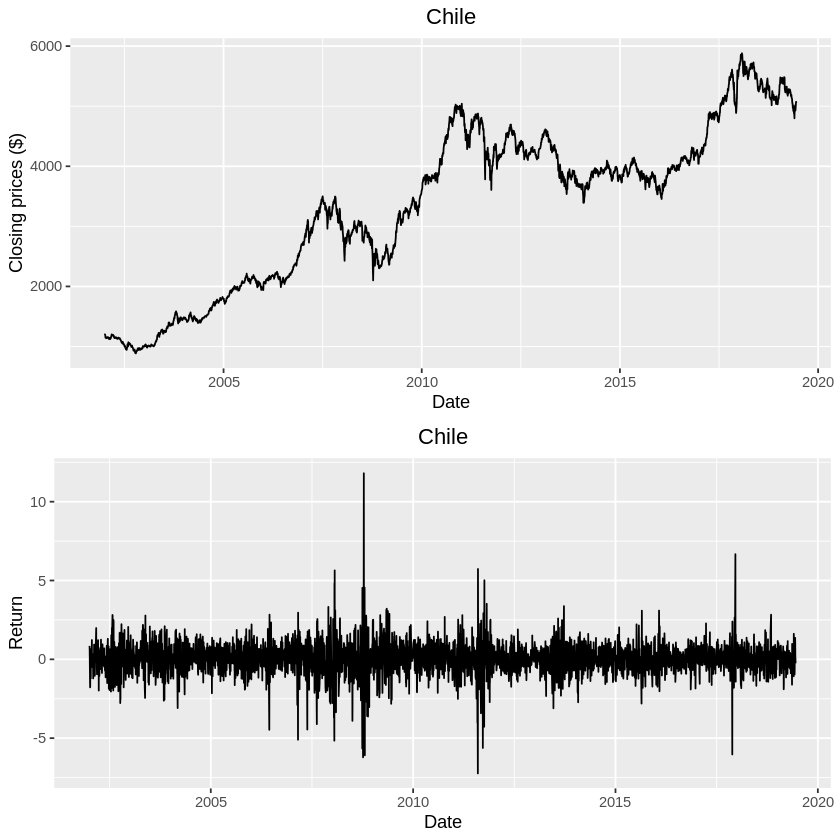

In [12]:
# Price chart
graph1 <- ggplot(IPSA.df,
                aes(x = index(IPSA.df), y = IPSA.df[,'IPSA.Close'])) +
                geom_line(color = "black") +
                ggtitle("Chile") +
                xlab("Date") +
                ylab("Closing prices ($)") +
                theme(plot.title = element_text(hjust = 0.5))

# Return chart
graph2 <- ggplot(IPSA.df,
                aes(x = index(IPSA.df), y = IPSA.df[,'IPSA.Return'])) +
                geom_line(color = "black") +
                ggtitle("Chile") +
                xlab("Date") +
                ylab("Return") +
                theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph1, graph2, ncol = 1, nrow = 2)

## 3. Descriptive statistic

In [13]:
# Packages
install.packages('moments')

library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘moments’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness




**Descriptive statistic**

In [14]:
# mean
round(mean(IPSA.df$IPSA.Return), 3)                         

[1] 0.033

In [15]:
# sd
round(sd(IPSA.df$IPSA.Return), 3)                           

[1] 0.962

In [16]:
# skewness
round(skewness(IPSA.df$IPSA.Return), 3)                     

IPSA.Return 
      0.029

In [17]:
# kurtosis
round(kurtosis(IPSA.df$IPSA.Return), 3)                     

IPSA.Return 
     13.335

In [18]:
# min
round(min(IPSA.df$IPSA.Return), 3)                          

[1] -7.236

In [19]:
# p5
round(quantile(IPSA.df$IPSA.Return, probs = 0.05), 3)       

5% 
-1.432

In [20]:
# p25
round(quantile(IPSA.df$IPSA.Return, probs = 0.25), 3)       

25% 
-0.455

In [21]:
# median
round(median(IPSA.df$IPSA.Return), 3)                       

[1] 0.045

In [22]:
# p75
round(quantile(IPSA.df$IPSA.Return, probs = 0.75), 3)       

75% 
0.547

In [23]:
# p95
round(quantile(IPSA.df$IPSA.Return, probs = 0.95), 3)       

95% 
1.445

In [24]:
# max
round(max(IPSA.df$IPSA.Return), 3)                          

[1] 11.803

In [25]:
# n observations
length(IPSA.df$IPSA.Return)                                 

[1] 4345

## 4. Series normality analysis

In [26]:
# Package
library(tseries)

In [27]:
jarque.bera.test(IPSA.df$IPSA.Return)


	Jarque Bera Test

data:  IPSA.df$IPSA.Return
X-squared = 19336, df = 2, p-value < 2.2e-16


## 5. Autocorrelation pattern analysis

In [28]:
# Packages
install.packages('TSA')
install.packages('aTSA')
install.packages('FinTS')

library(TSA)
library(aTSA)
library(FinTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘TSA’


The following objects are masked from ‘package:moments’:

    kurtosis, skewness


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar



Attaching package: ‘aTSA’


The following objects are masked from ‘package:tseries’:

    adf.test, kpss.test, pp.test


The following object is masked from ‘package:graphics’:

    identify




**McLeod-Li test for conditional heteroskedasticity (ARCH effect)**

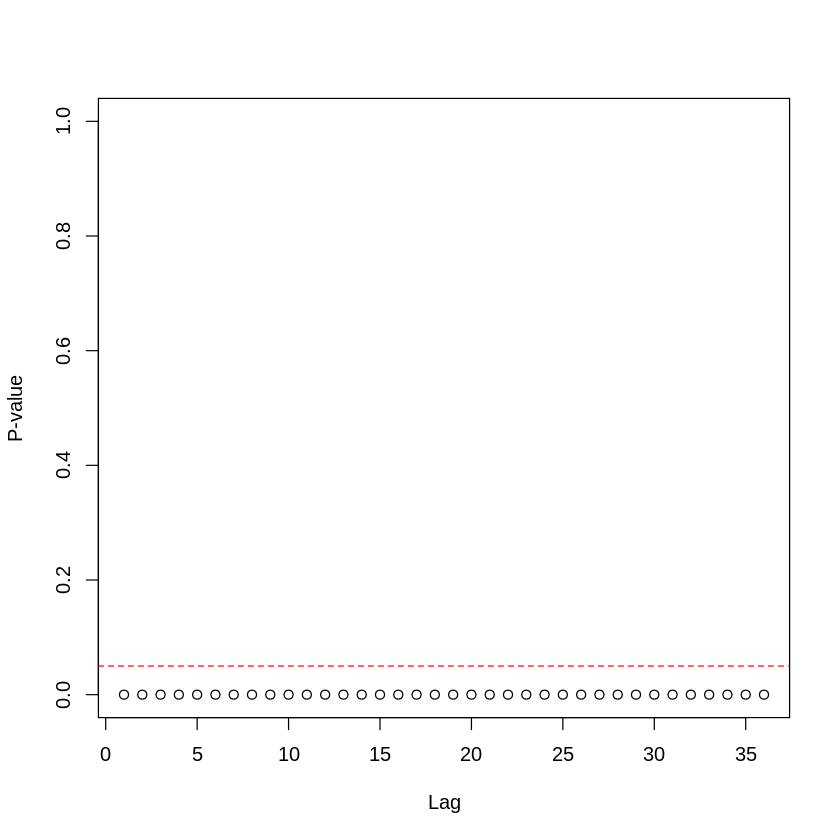

In [29]:
McLeod.Li.test(y = IPSA.df$IPSA.Return)
# p-valor < 1% => ARCH effect

**Lagrange Multiplier (LM) test for autoregressive conditional heteroscedasticity (ARCH)**

In [30]:
ArchTest(IPSA.df$IPSA.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  IPSA.df$IPSA.Return
Chi-squared = 755.48, df = 12, p-value < 2.2e-16


## 6. GARCH model estimation

In [31]:
# Packages
install.packages('tidyverse')
install.packages('FinTS')
install.packages('texreg')
install.packages('rugarch')

library(tidyverse)
library(FinTS)
library(texreg)
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘spd’, ‘chron’, ‘SkewHyperbolic’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::combine()         masks gridExtra::combine()
✖ lubridate::date()        masks base::date

In [32]:
# Parameters definition
ar_lag <- 0
ma_lag <- 0
arch_lag <- 1
garch_lag <- 1

**Linear GARCH model**

In [33]:
# Specification 
garch.spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(arch_lag, garch_lag)),
                         mean.model = list(armaOrder = c(ar_lag, ma_lag)),
                         distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [34]:
# Estimation
garch.fit <- ugarchfit(spec = garch.spec, data = IPSA.df$IPSA.Return)
round(garch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0507,0.0115,4.4148,0
omega,0.0292,0.0050,5.8163,0
alpha1,0.1436,0.0136,10.5587,0
beta1,0.8251,0.0160,51.4577,0
skew,0.9250,0.0182,50.8673,0


In [35]:
# Extracting variance series from the Linear GARCH model
var.garch <- ts(garch.fit@fit$sigma^2)
head(var.garch)

IPSA.df$IPSA.VolGARCH <- as.numeric(var.garch)
head(IPSA.df)

[1] 0.9261442 0.8861994 0.8070977 0.9219908 1.2694311 1.5250136

           IPSA.Close IPSA.Return IPSA.VolGARCH
2002-01-03    1195.93   0.8548685     0.9261442
2002-01-04    1203.38   0.6210098     0.8861994
2002-01-07    1188.95  -1.2063745     0.8070977
2002-01-08    1168.01  -1.7769069     0.9219908
2002-01-09    1148.13  -1.7166918     1.2694311
2002-01-10    1152.04   0.3399781     1.5250136

**EGARCH model**

In [36]:
# Specification 
egarch.spec <- ugarchspec(variance.model = list(model = "eGARCH",
                                                garchOrder = c(arch_lag, garch_lag)),
                          mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                          distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [37]:
# Estimation
egarch.fit <- ugarchfit(spec = egarch.spec, data = IPSA.df$IPSA.Return)
round(egarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0377,0.0115,3.2861,0.0010
omega,-0.0082,0.0037,-2.2496,0.0245
alpha1,-0.0564,0.0089,-6.3492,0.0000
beta1,0.9625,0.0061,158.2440,0.0000
gamma1,0.2410,0.0197,12.2252,0.0000
skew,0.9520,0.0188,50.6827,0.0000


In [38]:
# Extracting variance series from the EGARCH model
var.egarch <- ts(egarch.fit@fit$sigma^2)
head(var.egarch)

IPSA.df$IPSA.VolEGARCH <- as.numeric(var.egarch)
head(IPSA.df)

[1] 0.9258637 0.8887806 0.8188759 1.0160933 1.4193323 1.7761747

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH
2002-01-03    1195.93   0.8548685     0.9261442      0.9258637
2002-01-04    1203.38   0.6210098     0.8861994      0.8887806
2002-01-07    1188.95  -1.2063745     0.8070977      0.8188759
2002-01-08    1168.01  -1.7769069     0.9219908      1.0160933
2002-01-09    1148.13  -1.7166918     1.2694311      1.4193323
2002-01-10    1152.04   0.3399781     1.5250136      1.7761747

**GJR-GARCH model**

In [39]:
# Specification 
gjrgarch.spec <- ugarchspec(variance.model = list(model = "gjrGARCH",
                                                  garchOrder = c(arch_lag, garch_lag)),
                            mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                            distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [40]:
# Estimation
gjrgarch.fit <- ugarchfit(spec = gjrgarch.spec, data = IPSA.df$IPSA.Return)
round(gjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0374,0.0117,3.1998,0.0014
omega,0.0297,0.0046,6.4294,0.0000
alpha1,0.0782,0.0128,6.1290,0.0000
beta1,0.8383,0.0149,56.4414,0.0000
gamma1,0.0975,0.0158,6.1587,0.0000
skew,0.9415,0.0187,50.3178,0.0000


In [41]:
# Extracting variance series from the GJR-GARCH model
var.gjrgarch <- ts(gjrgarch.fit@fit$sigma^2)
head(var.gjrgarch)

IPSA.df$IPSA.VolGJRGARCH <- as.numeric(var.gjrgarch)
head(IPSA.df)

[1] 0.9258608 0.8581547 0.7757754 0.9519264 1.4061975 1.7492599

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-03    1195.93   0.8548685     0.9261442      0.9258637        0.9258608
2002-01-04    1203.38   0.6210098     0.8861994      0.8887806        0.8581547
2002-01-07    1188.95  -1.2063745     0.8070977      0.8188759        0.7757754
2002-01-08    1168.01  -1.7769069     0.9219908      1.0160933        0.9519264
2002-01-09    1148.13  -1.7166918     1.2694311      1.4193323        1.4061975
2002-01-10    1152.04   0.3399781     1.5250136      1.7761747        1.7492599

## 7. Realized GARCH model estimation

In [42]:
# Specification
realgarch.spec <- ugarchspec(mean.model = list(armaOrder = c(ar_lag, ma_lag),
                                               include.mean = FALSE),
                             variance.model = list(model = 'realGARCH',
                                                   garchOrder = c(arch_lag, garch_lag)),
                             distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution)

**Realized Linear GARCH**

In [43]:
# Estimation
realgarch.fit <- ugarchfit(realgarch.spec, IPSA.df$IPSA.Return,
                          solver = 'hybrid',
                          realizedVol = IPSA.df$IPSA.VolGARCH)
round(realgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0173,0.0244,0.7078,0.4790
alpha1,0.9463,0.0345,27.3913,0.0000
beta1,0.0000,0.0159,0.0000,1.0000
eta11,0.0031,0.0027,1.1228,0.2615
eta21,0.0152,0.0015,10.3155,0.0000
delta,1.0158,0.0335,30.3241,0.0000
lambda,0.1796,0.0019,93.1624,0.0000
skew,0.9195,0.0172,53.4232,0.0000
xi,-0.0326,0.0243,-1.3403,0.1801


In [44]:
# Extracting variance series from the Realized Linear GARCH model
var.realgarch <- ts(realgarch.fit@fit$sigma^2)
head(var.realgarch)

IPSA.df$IPSA.VolRealGARCH <- as.numeric(var.realgarch)
head(IPSA.df)

[1] 0.9269597 0.9461674 0.9075057 0.8306636 0.9421517 1.2750965

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-03    1195.93   0.8548685     0.9261442      0.9258637        0.9258608
2002-01-04    1203.38   0.6210098     0.8861994      0.8887806        0.8581547
2002-01-07    1188.95  -1.2063745     0.8070977      0.8188759        0.7757754
2002-01-08    1168.01  -1.7769069     0.9219908      1.0160933        0.9519264
2002-01-09    1148.13  -1.7166918     1.2694311      1.4193323        1.4061975
2002-01-10    1152.04   0.3399781     1.5250136      1.7761747        1.7492599
           IPSA.VolRealGARCH
2002-01-03         0.9269597
2002-01-04         0.9461674
2002-01-07         0.9075057
2002-01-08         0.8306636
2002-01-09         0.9421517
2002-01-10         1.2750965

**Realized EGARCH**

In [45]:
# Estimation
realegarch.fit <- ugarchfit(realgarch.spec, IPSA.df$IPSA.Return,
                            solver = 'hybrid',
                            realizedVol = IPSA.df$IPSA.VolEGARCH)
round(realegarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0324,0.0245,1.3233,0.1857
alpha1,1.0000,0.0347,28.8265,0.0000
beta1,0.0000,0.0158,0.0000,1.0000
eta11,-0.0089,0.0025,-3.5753,0.0003
eta21,0.0133,0.0014,9.5829,0.0000
delta,0.9652,0.0297,32.5263,0.0000
lambda,0.1639,0.0018,93.0295,0.0000
skew,0.9363,0.0176,53.3204,0.0000
xi,-0.0445,0.0230,-1.9326,0.0533


In [46]:
# Extracting variance series from the Realized EGARCH model
var.realegarch <- ts(realegarch.fit@fit$sigma^2)
head(var.realegarch)

IPSA.df$IPSA.VolRealEGARCH <- as.numeric(var.realegarch)
head(IPSA.df)

[1] 0.9269597 0.9563727 0.9180676 0.8458595 1.0495754 1.4661016

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-03    1195.93   0.8548685     0.9261442      0.9258637        0.9258608
2002-01-04    1203.38   0.6210098     0.8861994      0.8887806        0.8581547
2002-01-07    1188.95  -1.2063745     0.8070977      0.8188759        0.7757754
2002-01-08    1168.01  -1.7769069     0.9219908      1.0160933        0.9519264
2002-01-09    1148.13  -1.7166918     1.2694311      1.4193323        1.4061975
2002-01-10    1152.04   0.3399781     1.5250136      1.7761747        1.7492599
           IPSA.VolRealGARCH IPSA.VolRealEGARCH
2002-01-03         0.9269597          0.9269597
2002-01-04         0.9461674          0.9563727
2002-01-07         0.9075057          0.9180676
2002-01-08         0.8306636          0.8458595
2002-01-09         0.9421517          1.0495754
2002-01-10         1.2750965          1.4661016

**Realized GJR-GARCH**

In [47]:
# Estimation
realgjrgarch.fit <- ugarchfit(realgarch.spec, IPSA.df$IPSA.Return,
                              solver = 'hybrid',
                              realizedVol = IPSA.df$IPSA.VolGJRGARCH)
round(realgjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0151,0.0245,0.6163,0.5377
alpha1,0.9523,0.0347,27.4095,0.0000
beta1,0.0000,0.0159,0.0000,1.0000
eta11,-0.0070,0.0026,-2.6507,0.0080
eta21,0.0147,0.0014,10.1491,0.0000
delta,1.0122,0.0333,30.3635,0.0000
lambda,0.1732,0.0019,93.0606,0.0000
skew,0.9264,0.0175,53.0385,0.0000
xi,-0.0292,0.0244,-1.1972,0.2312


In [48]:
# Extracting variance series from the Realized GJR-GARCH model
var.realgjrgarch <- ts(realgjrgarch.fit@fit$sigma^2)
head(var.realgjrgarch)

IPSA.df$IPSA.VolRealGJRGARCH <- as.numeric(var.realgjrgarch)
head(IPSA.df)

[1] 0.9269597 0.9434110 0.8775921 0.7971721 0.9686880 1.4045946

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-03    1195.93   0.8548685     0.9261442      0.9258637        0.9258608
2002-01-04    1203.38   0.6210098     0.8861994      0.8887806        0.8581547
2002-01-07    1188.95  -1.2063745     0.8070977      0.8188759        0.7757754
2002-01-08    1168.01  -1.7769069     0.9219908      1.0160933        0.9519264
2002-01-09    1148.13  -1.7166918     1.2694311      1.4193323        1.4061975
2002-01-10    1152.04   0.3399781     1.5250136      1.7761747        1.7492599
           IPSA.VolRealGARCH IPSA.VolRealEGARCH IPSA.VolRealGJRGARCH
2002-01-03         0.9269597          0.9269597            0.9269597
2002-01-04         0.9461674          0.9563727            0.9434110
2002-01-07         0.9075057          0.9180676            0.8775921
2002-01-08         0.8306636          0.8458595            0.7971721
2002-01-09         0.9421517          1.0495754            0.9686880
2002-01-10         1.27509

## 8. Markov-Switching GARCH estimation

In [49]:
# Packages
install.packages('MSGARCH')

library(MSGARCH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘expm’, ‘fanplot’




2 regimes: low volatility and high volatility

**Linear MS GARCH**

In [50]:
# Specification
msgarch.spec <- CreateSpec(variance.spec = list(model = c("sGARCH")),
                           distribution.spec = list(distribution = c("snorm")),
                           switch.spec = list(K = 2))

In [51]:
# Estimation
msgarch.fit <- FitML(msgarch.spec, data = IPSA.df$IPSA.Return)    
summary(msgarch.fit)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0032     0.0028   1.1688 1.213e-01
alpha1_1   0.0380     0.0194   1.9597 2.501e-02
beta_1     0.9292     0.0076 122.9595    <1e-16
xi_1       1.0164     0.0550  18.4876    <1e-16
alpha0_2   0.0907     0.0429   2.1128 1.731e-02
alpha1_2   0.2613     0.1773   1.4739 7.025e-02
beta_2     0.7281     0.0080  91.5453    <1e-16
xi_2       0.8463     0.0361  23.4181    <1e-16
P_1_1      0.5490     0.1609   3.4123 3.221e-04
P_2_1      0.4386     0.1416   3.0977 9.750e-04
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [52]:
# Extracting variance series from the MS GARCH model
var.msgarch <- ts(Volatility(msgarch.fit))
head(var.msgarch)

IPSA.df$IPSA.VolMSGARCH <- as.numeric(var.msgarch)
head(IPSA.df)

t=1      t=2      t=3      t=4      t=5      t=6 
2.100640 1.838732 1.588841 1.536008 1.520136 1.494262

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-03    1195.93   0.8548685     0.9261442      0.9258637        0.9258608
2002-01-04    1203.38   0.6210098     0.8861994      0.8887806        0.8581547
2002-01-07    1188.95  -1.2063745     0.8070977      0.8188759        0.7757754
2002-01-08    1168.01  -1.7769069     0.9219908      1.0160933        0.9519264
2002-01-09    1148.13  -1.7166918     1.2694311      1.4193323        1.4061975
2002-01-10    1152.04   0.3399781     1.5250136      1.7761747        1.7492599
           IPSA.VolRealGARCH IPSA.VolRealEGARCH IPSA.VolRealGJRGARCH
2002-01-03         0.9269597          0.9269597            0.9269597
2002-01-04         0.9461674          0.9563727            0.9434110
2002-01-07         0.9075057          0.9180676            0.8775921
2002-01-08         0.8306636          0.8458595            0.7971721
2002-01-09         0.9421517          1.0495754            0.9686880
2002-01-10         1.27509

**MS EGARCH**

In [53]:
# Specification
msegarch.spec <- CreateSpec(variance.spec = list(model = c("eGARCH")),
                            distribution.spec = list(distribution = c("snorm")),
                            switch.spec = list(K = 2))

In [54]:
# Estimation
msegarch.fit <- FitML(msegarch.spec, data = IPSA.df$IPSA.Return)    
summary(msegarch.fit)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0263     0.0054  -4.8881 5.091e-07
alpha1_1   0.1382     0.0228   6.0740 6.238e-10
alpha2_1  -0.0584     0.0102  -5.7393 4.754e-09
beta_1     0.9642     0.0067 144.0014    <1e-16
xi_1       0.9459     0.0252  37.5996    <1e-16
alpha0_2   0.0830     0.0203   4.0982 2.082e-05
alpha1_2   0.2053     0.0545   3.7689 8.199e-05
alpha2_2  -0.1013     0.0353  -2.8687 2.061e-03
beta_2     0.9771     0.0112  87.5324    <1e-16
xi_2       0.8546     0.0719  11.8924    <1e-16
P_1_1      0.9746     0.0873  11.1639    <1e-16
P_2_1      0.1979     0.0135  1

In [55]:
# Extracting variance series from the MS EGARCH model
var.msegarch <- ts(Volatility(msegarch.fit))
head(var.msegarch)

IPSA.df$IPSA.VolMSEGARCH <- as.numeric(var.msegarch)
head(IPSA.df)

t=1      t=2      t=3      t=4      t=5      t=6 
2.162350 2.020076 1.271078 1.300721 1.689553 1.740414

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-03    1195.93   0.8548685     0.9261442      0.9258637        0.9258608
2002-01-04    1203.38   0.6210098     0.8861994      0.8887806        0.8581547
2002-01-07    1188.95  -1.2063745     0.8070977      0.8188759        0.7757754
2002-01-08    1168.01  -1.7769069     0.9219908      1.0160933        0.9519264
2002-01-09    1148.13  -1.7166918     1.2694311      1.4193323        1.4061975
2002-01-10    1152.04   0.3399781     1.5250136      1.7761747        1.7492599
           IPSA.VolRealGARCH IPSA.VolRealEGARCH IPSA.VolRealGJRGARCH
2002-01-03         0.9269597          0.9269597            0.9269597
2002-01-04         0.9461674          0.9563727            0.9434110
2002-01-07         0.9075057          0.9180676            0.8775921
2002-01-08         0.8306636          0.8458595            0.7971721
2002-01-09         0.9421517          1.0495754            0.9686880
2002-01-10         1.27509

**MS GJR-GARCH**

In [56]:
# Specification
msgjrgarch.spec <- CreateSpec(variance.spec = list(model = c("gjrGARCH")),
                              distribution.spec = list(distribution = c("snorm")),
                              switch.spec = list(K = 2))

In [57]:
# Estimation
msgjrgarch.fit <- FitML(msgjrgarch.spec, data = IPSA.df$IPSA.Return)    
summary(msgjrgarch.fit)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error t value  Pr(>|t|)
alpha0_1   0.0347     0.0055  6.3120 1.378e-10
alpha1_1   0.0345     0.0141  2.4421 7.301e-03
alpha2_1   0.1149     0.0229  5.0093 2.732e-07
beta_1     0.8498     0.0098 86.8712    <1e-16
xi_1       0.9514     0.0228 41.6432    <1e-16
alpha0_2   1.5498     0.5472  2.8323 2.310e-03
alpha1_2   0.0007     0.0131  0.0553 4.779e-01
alpha2_2   0.3590     0.2513  1.4284 7.659e-02
beta_2     0.3524     0.1577  2.2348 1.272e-02
xi_2       0.8625     0.0731 11.7929    <1e-16
P_1_1      0.9932     0.0306 32.4741    <1e-16
P_2_1      0.0877     0.0031 28.6385   

In [58]:
# Extracting variance series from the MS GJR-GARCH model
var.msgjrgarch <- ts(Volatility(msgjrgarch.fit))
head(var.msgjrgarch)

IPSA.df$IPSA.VolMSGJRGARCH <- as.numeric(var.msgjrgarch)
head(IPSA.df)

t=1       t=2       t=3       t=4       t=5       t=6 
0.9001960 0.8567934 0.7963010 0.9186154 1.1967925 1.3338303

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-03    1195.93   0.8548685     0.9261442      0.9258637        0.9258608
2002-01-04    1203.38   0.6210098     0.8861994      0.8887806        0.8581547
2002-01-07    1188.95  -1.2063745     0.8070977      0.8188759        0.7757754
2002-01-08    1168.01  -1.7769069     0.9219908      1.0160933        0.9519264
2002-01-09    1148.13  -1.7166918     1.2694311      1.4193323        1.4061975
2002-01-10    1152.04   0.3399781     1.5250136      1.7761747        1.7492599
           IPSA.VolRealGARCH IPSA.VolRealEGARCH IPSA.VolRealGJRGARCH
2002-01-03         0.9269597          0.9269597            0.9269597
2002-01-04         0.9461674          0.9563727            0.9434110
2002-01-07         0.9075057          0.9180676            0.8775921
2002-01-08         0.8306636          0.8458595            0.7971721
2002-01-09         0.9421517          1.0495754            0.9686880
2002-01-10         1.27509

## 9. Sample split: in-sample (70%) and out-sample (30%)

In [59]:
# Total number of lines 
nrow(IPSA.df)                

[1] 4345

In [60]:
# Cut-line
round(nrow(IPSA.df)*0.7, digits = 0)

[1] 3042

In [61]:
# In-sample
IPSA.df.in <- IPSA.df[1:round(nrow(IPSA.df)*0.7, digits = 0),]
dim(IPSA.df.in)

[1] 3042   11

In [62]:
# Out-sample
IPSA.df.out <- IPSA.df[(round(nrow(IPSA.df)*0.7, digits = 0)+1):nrow(IPSA.df),]
dim(IPSA.df.out)

[1] 1303   11

# 10. Forecast - GARCH models

In [63]:
# Packages
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('multDM')
install.packages('MCS')
install.packages('sandwich')
install.packages('lmtest')
install.packages('forecast')

library(Metrics)
library(MLmetrics)
library(multDM)
library(MCS)
library(sandwich)
library(lmtest)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘fastICA’, ‘gss’, ‘stabledist’, ‘fGarch’, ‘fBasics’, ‘MTS’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 


Attaching package

## (a) Linear GARCH

**Forecast**

In [64]:
# Model specification
garch.spec.pred <- garch.spec
setfixed(garch.spec.pred) <- as.list(coef(garch.fit))

In [65]:
# Model adjustment
garch.fit.pred <- ugarchfit(garch.spec,
                            IPSA.df$IPSA.Return,
                            out.sample = dim(IPSA.df.out)[1])

In [66]:
# Forecast calculated through adjustment
garch.pred <- ugarchforecast(garch.fit.pred,
                             n.ahead = 1,
                             n.roll = dim(IPSA.df.out)[1])

garch.forecast <- xts(sigma(garch.pred)[1,],
                       move(as.Date(names(sigma(garch.pred)[1,])), by = 1))

In [67]:
sigma.garch.pred <- ts(garch.forecast[-1,])
sigma.garch.true <- ts(IPSA.df.out$IPSA.VolGARCH)

sigma.garch <- na.omit(cbind(sigma.garch.pred,
                            sigma.garch.true))
head(sigma.garch)

,sigma.garch.pred,sigma.garch.true
1,0.8515467,0.8079782
2,0.8248559,0.6993270
3,0.7903953,0.6542524
4,0.8502225,0.6036934
5,0.8833903,0.7037342
6,0.8353937,0.7542936


**Performance evaluation**

In [69]:
# Forecast Error
garch.error <- sigma.garch[,'sigma.garch.pred'] - sigma.garch[,'sigma.garch.true']
head(garch.error)

A Time Series:
[1] 0.04356856 0.12552896 0.13614296 0.24652911 0.17965617 0.08110009

In [70]:
# Mean Square Error Loss
garch.mse <- MSE(sigma.garch[,'sigma.garch.pred'], 
                 sigma.garch[,'sigma.garch.true'])
round(garch.mse, digits = 3)

[1] 0.163

In [71]:
# Mean Absolute Error Loss
garch.mae <- MAE(sigma.garch[,'sigma.garch.pred'], 
                 sigma.garch[,'sigma.garch.true'])
round(garch.mae, digits = 3)   

[1] 0.249

In [72]:
# Root Mean Square Error Loss
garch.rmse <- RMSE(sigma.garch[,'sigma.garch.pred'], 
                   sigma.garch[,'sigma.garch.true'])
round(garch.rmse, digits = 3)

[1] 0.404

In [73]:
# Quasi-likelihood loss function
h <- sigma.garch[,'sigma.garch.true']

h.hat <- sigma.garch[,'sigma.garch.pred']     
garch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(garch.qlike, digits = 3)

[1] 0.692

In [74]:
# Linear regression to assess forecast performance 
garch.model <- lm(sigma.garch.true ~ sigma.garch.pred,
                  data = sigma.garch)
round(coeftest(garch.model, NeweyWest(garch.model,
                                      lag = bwNeweyWest(garch.model),
                                      prewhite = F)), 3)
round(summary(garch.model)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)        -1.008      0.153  -6.601 < 2.2e-16 ***
sigma.garch.pred    2.134      0.213  10.025 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.773

##(b) EGARCH

**Forecast**

In [75]:
# Model specification
egarch.spec.pred <- egarch.spec
setfixed(egarch.spec.pred) <- as.list(coef(egarch.fit))

In [76]:
# Model adjustment
egarch.fit.pred <- ugarchfit(egarch.spec,
                             IPSA.df$IPSA.Return,
                             out.sample = dim(IPSA.df.out)[1])

In [77]:
# Forecast calculated through adjustment
egarch.pred <- ugarchforecast(egarch.fit.pred,
                              n.ahead = 1,
                              n.roll = dim(IPSA.df.out)[1])

egarch.forecast <- xts(sigma(egarch.pred)[1,],
                       move(as.Date(names(sigma(egarch.pred)[1,])), by = 1))

In [78]:
sigma.egarch.pred <- ts(egarch.forecast[-1,])
sigma.egarch.true <- ts(IPSA.df.out$IPSA.VolEGARCH)

sigma.egarch <- na.omit(cbind(sigma.egarch.pred,
                              sigma.egarch.true))
head(sigma.egarch)

,sigma.egarch.pred,sigma.egarch.true
1,0.9277578,0.9675516
2,0.9270304,0.8181092
3,0.8797976,0.8122909
4,0.8969184,0.7427731
5,0.9738969,0.7815279
6,0.9137594,0.9005326


**Performance evaluation**

In [79]:
# Forecast Error 
egarch.error <- sigma.egarch[,'sigma.egarch.pred'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error)

A Time Series:
[1] -0.03979379  0.10892125  0.06750666  0.15414535  0.19236902  0.01322677

In [80]:
# Mean Square Error Loss
egarch.mse <- MSE(sigma.egarch[,'sigma.egarch.pred'],
                  sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse, digits = 3)

[1] 0.085

In [81]:
# Mean Square Error Loss Relative
egarch.mse.relative <- egarch.mse/garch.mse
round(egarch.mse.relative, digits = 3)   

[1] 0.52

In [82]:
# Mean Absolute Error Loss
egarch.mae <- MAE(sigma.egarch[,'sigma.egarch.pred'],
                  sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae, digits = 3)

[1] 0.228

In [83]:
# Mean Absolute Error Relative
egarch.mae.relative <- egarch.mae/garch.mae
round(egarch.mae.relative, digits = 3)

[1] 0.915

In [84]:
# Root Mean Square Error Loss
egarch.rmse <- RMSE(sigma.egarch[,'sigma.egarch.pred'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse, digits = 3)

[1] 0.291

In [85]:
# Root Mean Square Error Loss Relative
egarch.rmse.relative <- egarch.rmse/garch.rmse
round(egarch.rmse.relative, digits = 3)

[1] 0.721

In [86]:
# Quasi-likelihood loss function
h <- sigma.egarch[,'sigma.egarch.true']

h.hat <- sigma.egarch[,'sigma.egarch.pred']     
egarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(egarch.qlike, digits = 3)

[1] 0.711

In [87]:
# Diebold-Mariano test for predictive accuracy
e1 <- egarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = -2.8216, Forecast horizon = 1, Loss function power = 2, p-value =
0.004851
alternative hypothesis: two.sided


In [88]:
# Linear regression to assess forecast performance
egarch.model <- lm(sigma.egarch.true ~ sigma.egarch.pred, 
                   data = sigma.egarch)
round(coeftest(egarch.model, NeweyWest(egarch.model,
                                       lag = bwNeweyWest(egarch.model),
                                       prewhite = F)), 3)
round(summary(egarch.model)$adj.r.squared, 3)


t test of coefficients:

                  Estimate Std. Error t value  Pr(>|t|)    
(Intercept)         -0.729      0.116  -6.301 < 2.2e-16 ***
sigma.egarch.pred    1.724      0.160  10.804 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.782

#11. Forecast - Realized GARCH models

##(a) Realized Linear GARCH

**Forecast**

In [90]:
# Model specification
realgarch.spec.pred <- realgarch.spec
setfixed(realgarch.spec.pred) <- as.list(coef(realgarch.fit))

In [91]:
# Model adjustment
realgarch.fit.pred <- ugarchfit(realgarch.spec,
                                IPSA.df$IPSA.Return,
                                out.sample = dim(IPSA.df.out)[1],
                                solver = 'hybrid',
                                realizedVol = IPSA.df$IPSA.VolGARCH)

In [92]:
# Forecast calculated through adjustment
realgarch.pred <- ugarchforecast(realgarch.fit.pred,
                                 n.ahead = 1,
                                 n.roll = dim(IPSA.df.out)[1])

realgarch.forecast <- xts(sigma(realgarch.pred)[1,],
                          move(as.Date(names(sigma(realgarch.pred)[1,])), by = 1))

In [94]:
sigma.realgarch.pred <- ts(realgarch.forecast[-1,])
sigma.realgarch.true <- ts(IPSA.df.out$IPSA.VolRealGARCH)

sigma.realgarch <- na.omit(cbind(sigma.realgarch.pred,
                                sigma.realgarch.true))
head(sigma.realgarch)

,sigma.realgarch.pred,sigma.realgarch.true
1,0.9013039,0.7806171
2,0.8374492,0.8315211
3,0.8149617,0.7253089
4,0.7812801,0.6809925
5,0.8457200,0.6310877
6,0.8739839,0.7296336


**Performance evaluation**

In [96]:
# Forecast Error
realgarch.error <- sigma.realgarch[,'sigma.realgarch.pred'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error)

A Time Series:
[1] 0.120686866 0.005928128 0.089652803 0.100287598 0.214632326 0.144350295

In [97]:
# Mean Square Error Loss
realgarch.mse <- MSE(sigma.realgarch[,'sigma.realgarch.pred'],
                     sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse, digits = 3)

[1] 0.137

In [98]:
# Mean Square Error Loss Relative
realgarch.mse.relative <- realgarch.mse/garch.mse
round(realgarch.mse.relative, digits = 3)

[1] 0.838

In [99]:
# Mean Absolute Error Loss
realgarch.mae <- MAE(sigma.realgarch[,'sigma.realgarch.pred'],
                     sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae, digits = 3)

[1] 0.223

In [100]:
# Mean Absolute Error Loss Relative
realgarch.mae.relative <- realgarch.mae/garch.mae
round(realgarch.mae.relative, digits = 3)

[1] 0.893

In [101]:
# Root Mean Square Error Loss
realgarch.rmse <- RMSE(sigma.realgarch[,'sigma.realgarch.pred'],
                       sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse, digits = 3)

[1] 0.37

In [102]:
# Root Mean Square Error Loss Relative
realgarch.rmse.relative <- realgarch.rmse/garch.rmse
round(realgarch.rmse.relative, digits = 3)

[1] 0.915

In [103]:
# Quasi-likelihood loss function
h <- sigma.realgarch[,'sigma.realgarch.true']

h.hat <- sigma.realgarch[,'sigma.realgarch.pred']     
realgarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(realgarch.qlike, digits = 3)

[1] 0.688

In [104]:
# Diebold-Mariano test for predictive accuracy
e1 <- realgarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = -1.0659, Forecast horizon = 1, Loss function power = 2, p-value =
0.2867
alternative hypothesis: two.sided


In [105]:
# Linear regression to assess forecast performance
realgarch.model <- lm(sigma.realgarch.true ~ sigma.realgarch.pred,
                      data = sigma.realgarch)
round(coeftest(realgarch.model, NeweyWest(realgarch.model,
                                          lag = bwNeweyWest(realgarch.model),
                                          prewhite = F)), 3)
round(summary(realgarch.model)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -0.998      0.147  -6.795 < 2.2e-16 ***
sigma.realgarch.pred    2.162      0.206  10.510 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.783

##(b) Realized EGARCH

**Forecast**

In [106]:
# Model specification
realegarch.spec.pred <- realgarch.spec
setfixed(realegarch.spec.pred) <- as.list(coef(realegarch.fit))

In [107]:
# Model adjustment
realegarch.fit.pred <- ugarchfit(realgarch.spec,
                                 IPSA.df$IPSA.Return,
                                 out.sample = dim(IPSA.df.out)[1],
                                 solver = 'hybrid',
                                 realizedVol = IPSA.df$IPSA.VolEGARCH)

In [108]:
# Forecast calculated through adjustment
realegarch.pred <- ugarchforecast(realegarch.fit.pred,
                                  n.ahead = 1,
                                  n.roll = dim(IPSA.df.out)[1])

realegarch.forecast <- xts(sigma(realegarch.pred)[1,],
                           move(as.Date(names(sigma(realegarch.pred)[1,])), by = 1))

In [109]:
sigma.realegarch.pred <- ts(realegarch.forecast[-1,])
sigma.realegarch.true <- ts(IPSA.df.out$IPSA.VolRealEGARCH)

sigma.realegarch <- na.omit(cbind(sigma.realegarch.pred,
                                 sigma.realegarch.true))
head(sigma.realegarch)

,sigma.realegarch.pred,sigma.realegarch.true
1,0.9824041,0.8701520
2,0.9048091,0.9994342
3,0.9017190,0.8450675
4,0.8634006,0.8390575
5,0.8895053,0.7672489
6,0.9439237,0.8072808


**Performance evaluation**

In [110]:
# Forecast Error
realegarch.error <- sigma.realegarch[,'sigma.realegarch.pred'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error)

A Time Series:
[1]  0.11225203 -0.09462512  0.05665159  0.02434303  0.12225632  0.13664286

In [111]:
# Mean Square Error Loss
realegarch.mse <- MSE(sigma.realegarch[,'sigma.realegarch.pred'],
                      sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse, digits = 3)

[1] 0.082

In [112]:
# Mean Square Error Loss Relative
realegarch.mse.relative <- realegarch.mse/garch.mse
round(realegarch.mse.relative, digits = 3)

[1] 0.502

In [113]:
# Mean Absolute Error Loss
realegarch.mae <- MAE(sigma.realegarch[,'sigma.realegarch.pred'],
                      sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae, digits = 3)

[1] 0.206

In [114]:
# Mean Absolute Error Relative
realegarch.mae.relative <- realegarch.mae/garch.mae
round(realegarch.mae.relative, digits = 3)

[1] 0.826

In [115]:
# Root Mean Square Error Loss 
realegarch.rmse <- RMSE(sigma.realegarch[,'sigma.realegarch.pred'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse, digits = 3)

[1] 0.286

In [116]:
# Root Mean Square Error Loss Relative
realegarch.rmse.relative <- realegarch.rmse/garch.rmse
round(realegarch.rmse.relative, digits = 3)

[1] 0.709

In [117]:
# Quasi-likelihood loss function
h <- sigma.realegarch[,'sigma.realegarch.true']

h.hat <- sigma.realegarch[,'sigma.realegarch.pred']     
realegarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(realegarch.qlike, digits = 3)

[1] 0.689

In [118]:
# Diebold-Mariano test for predictive accuracy - test 2
e1 <- realegarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = -2.7721, Forecast horizon = 1, Loss function power = 2, p-value =
0.005648
alternative hypothesis: two.sided


In [119]:
# Linear regression to assess forecast performance
realegarch.model <- lm(sigma.realegarch.true ~ sigma.realegarch.pred,
                       data = sigma.realegarch)
round(coeftest(realegarch.model, NeweyWest(realegarch.model,
                                           lag = bwNeweyWest(realegarch.model),
                                           prewhite = F)), 3)
round(summary(realegarch.model)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -0.839      0.129  -6.507 < 2.2e-16 ***
sigma.realegarch.pred    1.936      0.180  10.731 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.8

#13. Monthly volatility

##(a) Transformation of a daily frequency to monthly frequency

In [120]:
IPSA.df.month <- apply.monthly(IPSA.df, FUN = mean)
head(IPSA.df.month)

           IPSA.Close IPSA.Return IPSA.VolGARCH IPSA.VolEGARCH IPSA.VolGJRGARCH
2002-01-31   1155.741 -0.13295971     0.8274612      0.9066141        0.9229718
2002-02-28   1136.423 -0.03760536     0.4520856      0.4998333        0.4953357
2002-03-28   1182.891  0.08305779     0.6618496      0.5994132        0.5923153
2002-04-30   1145.021 -0.10672731     0.6052211      0.7053275        0.6744542
2002-05-31   1130.733 -0.17028960     0.3897009      0.4411224        0.4203693
2002-06-28   1061.376 -0.31811805     0.7382956      0.8984618        0.8347190
           IPSA.VolRealGARCH IPSA.VolRealEGARCH IPSA.VolRealGJRGARCH
2002-01-31         0.8695701          0.9573592            0.9580523
2002-02-28         0.4805129          0.5193116            0.5209882
2002-03-28         0.6579477          0.5890859            0.5813403
2002-04-30         0.6591724          0.7506409            0.7271979
2002-05-31         0.4087975          0.4477140            0.4339518
2002-06-28         0.74109

##(b) Lag Length Selection

In [121]:
# Package
install.packages('tsDyn')

library(tsDyn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘deSolve’, ‘strucchange’, ‘iterators’, ‘mnormt’, ‘tseriesChaos’, ‘vars’, ‘foreach’



Attaching package: ‘tsDyn’


The following object is masked from ‘package:MLmetrics’:

    MAPE


The following object is masked from ‘package:Metrics’:

    mse




In [122]:
lags.select(IPSA.df.month$IPSA.VolGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [123]:
lags.select(IPSA.df.month$IPSA.VolEGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [124]:
lags.select(IPSA.df.month$IPSA.VolRealGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [125]:
lags.select(IPSA.df.month$IPSA.VolRealEGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

##(c) Import dataset

**EPU**

In [126]:
# Package
library(readxl)

In [127]:
EPU <- read_excel("EPU_All_Country_Data.xlsx",
                  sheet = "Import",
                  col_types = c("date", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric"))
head(EPU)

MM.YYYY,GEPU_current,Brazil,Russia,India,Chile,Mexico,China,Canada,France,Germany,Japan,UK,US
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-01,63.43916,54.60320,117.12624,55.47412,104.18382,161.02013,44.004440,46.92811,18.45134,73.23399,78.12204,30.08247,88.98869
2000-02-01,58.77943,41.26398,27.02751,58.04263,76.43725,157.84093,9.066709,45.72284,33.22514,97.35842,78.62767,36.62590,73.36520
2000-03-01,61.33933,73.60725,27.27277,63.43669,78.59699,90.80582,44.399136,39.32267,42.40266,96.09151,79.74557,45.16381,73.29862
2000-04-01,64.76240,96.34906,25.90913,78.92112,63.72873,93.59448,35.441414,53.17447,16.59283,69.44795,103.12970,42.74244,70.59975
2000-05-01,86.84892,189.96852,42.97606,59.61799,120.89192,136.35007,71.135803,54.20769,55.37305,135.28714,86.34306,53.87834,118.14321
2000-06-01,88.23903,106.87265,115.94142,110.34407,156.83112,216.03893,36.856976,45.04951,35.07029,58.29012,150.85790,51.15050,109.58423


In [128]:
attach(EPU)

**VIX**

In [129]:
getSymbols("^VIX", from = '2000-01-01', to = '2021-10-31', periodicity = "monthly")

[1] "^VIX"

In [130]:
head(VIX)

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2000-01-01    24.36    29.00   19.51     24.95          0        24.95
2000-02-01    24.43    28.12   20.69     23.37          0        23.37
2000-03-01    22.65    25.87   19.19     24.11          0        24.11
2000-04-01    24.99    34.31   23.25     26.20          0        26.20
2000-05-01    26.07    32.89   23.23     23.65          0        23.65
2000-06-01    23.20    25.01   19.39     19.54          0        19.54

In [131]:
VIX <- na.omit(VIX)

##(d) Estimation

**Benchmark model**

In [132]:
# Lag of uncertainty variables (lag = 1)
lag.epu <- ts(Lag(EPU$Chile, 1))
lag.gepu <- ts(Lag(EPU$GEPU_current, 1))
lag.vix <- ts(Lag(VIX$VIX.Close, 1))

**Linear GARCH**

In [133]:
# Estimation 1 - GARCH (Best BIC:  lag= 1)
garch <- ts(log(IPSA.df.month$IPSA.VolGARCH))
lag.garch.1 <- ts(Lag(log(IPSA.df.month$IPSA.VolGARCH), 1))

ols.garch <- cbind(garch, lag.garch.1, 
                  lag.epu, lag.gepu, lag.vix)

model.garch.1 <- lm(garch ~  lag.garch.1, 
                    data = ols.garch)

round(coeftest(model.garch.1, NeweyWest(model.garch.1, 
                                        lag = bwNeweyWest(model.garch.1), 
                                        prewhite = F)), 3)

round(summary(model.garch.1)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.125      0.039  -3.222    0.001 ***
lag.garch.1    0.630      0.045  14.072   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.394

In [134]:
# Estimation 2 - GARCH (Best BIC:  lag= 1)
model.garch.2 <- lm(garch ~  lag.garch.1 + lag.epu, 
                    data = ols.garch)

round(coeftest(model.garch.2, NeweyWest(model.garch.2, 
                                        lag = bwNeweyWest(model.garch.2), 
                                        prewhite = F)), 3)

round(summary(model.garch.2)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.034      0.078  -0.434    0.665    
lag.garch.1    0.611      0.046  13.214   <2e-16 ***
lag.epu       -0.001      0.001  -1.398    0.164    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.395

In [135]:
# Estimation 3 - GARCH (Best BIC:  lag= 1)
model.garch.3 <- lm(garch ~  lag.garch.1 + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.3, NeweyWest(model.garch.3, 
                                        lag = bwNeweyWest(model.garch.3), 
                                        prewhite = F)), 3)

round(summary(model.garch.3)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.059      0.087  -0.674    0.501    
lag.garch.1    0.628      0.039  16.108   <2e-16 ***
lag.vix       -0.003      0.003  -0.958    0.339    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.392

In [136]:
# Estimation 4 - GARCH (Best BIC:  lag= 1)
model.garch.4 <- lm(garch ~  lag.garch.1 + lag.epu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.4, NeweyWest(model.garch.4, 
                                        lag = bwNeweyWest(model.garch.4), 
                                        prewhite = F)), 3)

round(summary(model.garch.4)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.002      0.095   0.026    0.979    
lag.garch.1    0.612      0.046  13.451   <2e-16 ***
lag.epu       -0.001      0.001  -1.173    0.242    
lag.vix       -0.002      0.003  -0.665    0.507    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.393

In [137]:
# Estimation 5 - GARCH (Best BIC:  lag= 1)
model.garch.5 <- lm(garch ~  lag.garch.1 + lag.epu + lag.gepu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.5, NeweyWest(model.garch.5, 
                                        lag = bwNeweyWest(model.garch.5), 
                                        prewhite = F)), 3)

round(summary(model.garch.5)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.091      0.114   0.796    0.427    
lag.garch.1    0.589      0.045  13.121   <2e-16 ***
lag.epu        0.000      0.001  -0.272    0.786    
lag.gepu      -0.002      0.001  -2.279    0.024 *  
lag.vix       -0.001      0.003  -0.264    0.792    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.4

**EGARCH**

In [138]:
# Estimation 1 - EGARCH (Best BIC:  lag= 1)
egarch <- ts(log(IPSA.df.month$IPSA.VolEGARCH))
lag.egarch.1 <- ts(Lag(log(IPSA.df.month$IPSA.VolEGARCH), 1))

ols.egarch <- cbind(egarch, lag.egarch.1,
                    lag.epu, lag.gepu, lag.vix)

model.egarch.1 <- lm(egarch ~  lag.egarch.1, 
                    data = ols.egarch)

round(coeftest(model.egarch.1, NeweyWest(model.egarch.1, 
                                         lag = bwNeweyWest(model.egarch.1), 
                                         prewhite = F)), 3)

round(summary(model.egarch.1)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.125      0.037  -3.406    0.001 ***
lag.egarch.1    0.640      0.045  14.077   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.407

In [139]:
# Estimation 2 - EGARCH (Best BIC:  lag= 1)
model.egarch.2 <- lm(egarch ~  lag.egarch.1 + lag.epu, 
                     data = ols.egarch)

round(coeftest(model.egarch.2, NeweyWest(model.egarch.2, 
                                         lag = bwNeweyWest(model.egarch.2), 
                                         prewhite = F)), 3)

round(summary(model.egarch.2)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.022      0.073  -0.307    0.759    
lag.egarch.1    0.620      0.048  13.055   <2e-16 ***
lag.epu        -0.001      0.001  -1.660    0.098 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.411

In [140]:
# Estimation 3 - EGARCH (Best BIC:  lag= 1)
model.egarch.3 <- lm(egarch ~  lag.egarch.1 + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.3, NeweyWest(model.egarch.3, 
                                         lag = bwNeweyWest(model.egarch.3), 
                                         prewhite = F)), 3)

round(summary(model.egarch.3)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.067      0.082  -0.823    0.411    
lag.egarch.1    0.639      0.040  16.171   <2e-16 ***
lag.vix        -0.003      0.003  -0.894    0.373    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.406

In [141]:
# Estimation 4 - EGARCH (Best BIC:  lag= 1)
model.egarch.4 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.4, NeweyWest(model.egarch.4, 
                                         lag = bwNeweyWest(model.egarch.4), 
                                         prewhite = F)), 3)

round(summary(model.egarch.4)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.005      0.089   0.052    0.959    
lag.egarch.1    0.621      0.047  13.201   <2e-16 ***
lag.epu        -0.001      0.001  -1.480    0.140    
lag.vix        -0.002      0.003  -0.535    0.593    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.409

In [142]:
# Estimation 5 - EGARCH (Best BIC:  lag= 1)
model.egarch.5 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.gepu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.5, NeweyWest(model.egarch.5, 
                                         lag = bwNeweyWest(model.egarch.5), 
                                         prewhite = F)), 3)

round(summary(model.egarch.5)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.068      0.107   0.632    0.528    
lag.egarch.1    0.605      0.047  12.887   <2e-16 ***
lag.epu        -0.001      0.001  -0.670    0.504    
lag.gepu       -0.001      0.001  -1.708    0.089 .  
lag.vix        -0.001      0.003  -0.209    0.835    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.412

**Realized Linear GARCH**

In [143]:
# Estimation 1 - Realized Linear GARCH (Best BIC:  lag= 1)
realgarch <- ts(log(IPSA.df.month$IPSA.VolRealGARCH))
lag.realgarch.1 <- ts(Lag(log(IPSA.df.month$IPSA.VolRealGARCH), 1))

ols.realgarch <- cbind(realgarch, lag.realgarch.1, 
                       lag.epu, lag.gepu, lag.vix)

model.realgarch.1 <- lm(realgarch ~  lag.realgarch.1, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.1, NeweyWest(model.realgarch.1, 
                                            lag = bwNeweyWest(model.realgarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.1)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.114      0.036  -3.150    0.002 ** 
lag.realgarch.1    0.627      0.044  14.148   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.39

In [144]:
# Estimation 2 - Realized Linear GARCH (Best BIC:  lag= 1)
model.realgarch.2 <- lm(realgarch ~  lag.realgarch.1 + lag.epu, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.2, NeweyWest(model.realgarch.2, 
                                            lag = bwNeweyWest(model.realgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.2)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.026      0.074  -0.356    0.722    
lag.realgarch.1    0.608      0.046  13.164   <2e-16 ***
lag.epu           -0.001      0.001  -1.418    0.158    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.392

In [145]:
# Estimation 3 - Realized Linear GARCH (Best BIC:  lag= 1)
model.realgarch.3 <- lm(realgarch ~  lag.realgarch.1 + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.3, NeweyWest(model.realgarch.3, 
                                            lag = bwNeweyWest(model.realgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.3)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.050      0.083  -0.607    0.545    
lag.realgarch.1    0.625      0.038  16.279   <2e-16 ***
lag.vix           -0.003      0.003  -0.952    0.342    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.389

In [146]:
# Estimation 4 - Realized Linear GARCH (Best BIC:  lag= 1)
model.realgarch.4 <- lm(realgarch ~  lag.realgarch.1 + lag.epu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.4, NeweyWest(model.realgarch.4, 
                                            lag = bwNeweyWest(model.realgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.4)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.008      0.090   0.093    0.926    
lag.realgarch.1    0.609      0.045  13.401   <2e-16 ***
lag.epu           -0.001      0.001  -1.189    0.236    
lag.vix           -0.002      0.003  -0.660    0.510    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.389

In [147]:
# Estimation 5 - Realized Linear GARCH (Best BIC:  lag= 1)
model.realgarch.5 <- lm(realgarch ~  lag.realgarch.1 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.5, NeweyWest(model.realgarch.5, 
                                            lag = bwNeweyWest(model.realgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.5)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.093      0.108   0.862    0.390    
lag.realgarch.1    0.586      0.045  12.956   <2e-16 ***
lag.epu            0.000      0.001  -0.273    0.785    
lag.gepu          -0.002      0.001  -2.254    0.025 *  
lag.vix           -0.001      0.003  -0.257    0.797    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.397

**Realized EGARCH**

In [148]:
# Estimation 1 - Realized EGARCH (Best BIC:  lag= 1)
realegarch <- ts(log(IPSA.df.month$IPSA.VolRealEGARCH))
lag.realegarch.1 <- ts(Lag(log(IPSA.df.month$IPSA.VolRealEGARCH), 1))

ols.realegarch <- cbind(realegarch, lag.realegarch.1,
                        lag.epu, lag.gepu, lag.vix)

model.realegarch.1 <- lm(realegarch ~  lag.realegarch.1, 
                        data = ols.realegarch)

round(coeftest(model.realegarch.1, NeweyWest(model.realegarch.1, 
                                            lag = bwNeweyWest(model.realegarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realegarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.114      0.035  -3.255    0.001 ***
lag.realegarch.1    0.638      0.044  14.584   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.404

In [149]:
# Estimation 2 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.2 <- lm(realegarch ~  lag.realegarch.1 + lag.epu, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.2, NeweyWest(model.realegarch.2, 
                                              lag = bwNeweyWest(model.realegarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.011      0.073  -0.152    0.879    
lag.realegarch.1    0.618      0.047  13.162   <2e-16 ***
lag.epu            -0.001      0.001  -1.655    0.100 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.408

In [150]:
# Estimation 3 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.3 <- lm(realegarch ~  lag.realegarch.1 + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.3, NeweyWest(model.realegarch.3, 
                                              lag = bwNeweyWest(model.realegarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.054      0.082  -0.661    0.509    
lag.realegarch.1    0.637      0.039  16.461   <2e-16 ***
lag.vix            -0.003      0.003  -0.905    0.367    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.403

In [151]:
# Estimation 4 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.4 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.4, NeweyWest(model.realegarch.4, 
                                              lag = bwNeweyWest(model.realegarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.017      0.090   0.194    0.846    
lag.realegarch.1    0.618      0.046  13.307   <2e-16 ***
lag.epu            -0.001      0.001  -1.467    0.144    
lag.vix            -0.002      0.003  -0.556    0.579    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.405

In [152]:
# Estimation 5 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.5 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.5, NeweyWest(model.realegarch.5, 
                                              lag = bwNeweyWest(model.realegarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.082      0.107   0.768    0.443    
lag.realegarch.1    0.603      0.046  13.000   <2e-16 ***
lag.epu            -0.001      0.001  -0.647    0.518    
lag.gepu           -0.001      0.001  -1.707    0.089 .  
lag.vix            -0.001      0.003  -0.230    0.818    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.409